In [1]:
import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_1samp
import math
from statsmodels.stats.multitest  import fdrcorrection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.signal import savgol_filter
from scipy import stats
import matplotlib.cm as cm
from pygam import LinearGAM, s, f

In [2]:
SAaxis = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/modules/Sensorimotor-Association_axis/Sensorimotor_Association_Axis_AverageRanks.csv')

In [3]:
partl = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/derivative/imageData_t1/test/n125_long_inc_part_coef_avg_nodewise_avgrunsschaefer400lh_age.csv')
partr = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/derivative/imageData_t1/test/n125_long_inc_part_coef_avg_nodewise_avgrunsschaefer400rh_age.csv')
part = pd.concat([partl.iloc[:, :-5],partr.iloc[:, :]], axis=1)
H = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/derivative/hurst_exponent/hurst_age.csv')

In [4]:
part = part.sort_values('fsid')
H = H.sort_values('fsid')

In [5]:
realage = pd.read_csv('/Users/monaminishio/Desktop/HOME1/SurfaceArea/dat/t1.csv')
ages = []
for fsid in H.fsid:
    ages.append(realage[realage.record_id==fsid.split('-')[1]].age_scan.values[0])
H['age_scan'] = ages
part['age_scan'] = ages

In [6]:
sa = pd.DataFrame(SAaxis['finalrank.wholebrain'].values).sort_values(0).index.values

In [7]:
df = pd.concat([H.age_scan,H.iloc[:, :400].mean(axis=1)], axis=1)
df.columns = ['age_scan', 'H']
df.to_csv('/Users/monaminishio/Desktop/HOME1/SurfaceArea/scripts/pvalues/H_age.csv', index=False)

In [8]:
H['age_bin'] = [round(x, 0) for x in H.age_scan]
part['age_bin'] = [round(x,0) for x in part.age_scan]

In [9]:
part['mean'] = part.iloc[:, :400].mean(axis=1).values

In [10]:
partlh = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/derivative/imageData_t1/test/n125_long_inc_part_coef_avg_nodewise_avgrunsschaefer400lh_median_income.csv')
partrh = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/derivative/imageData_t1/test/n125_long_inc_part_coef_avg_nodewise_avgrunsschaefer400rh_median_income.csv')
part_income = pd.concat([partlh.iloc[:, :200], partrh], axis=1)
H_income = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/derivative/hurst_exponent/hurst_income.csv')
H_income = H_income.loc[:, ['fsid', 'income_median']]
part_income = part_income.loc[:, ['fsid', 'income_median']]
H_income = pd.merge(H, H_income, how='right')
part_income = pd.merge(part, part_income, how='right')

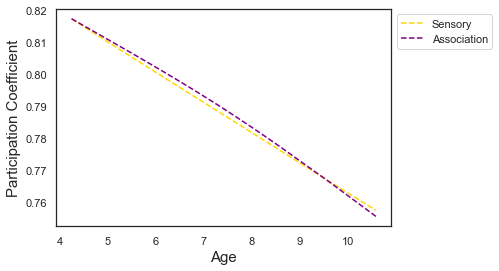

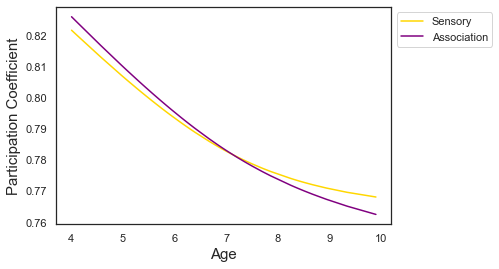

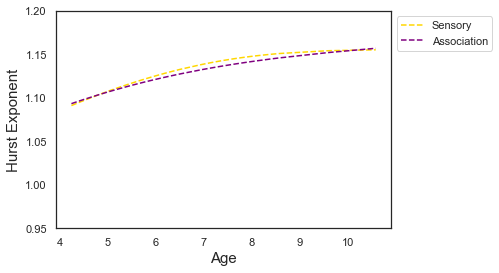

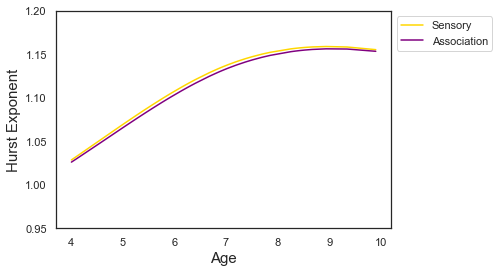

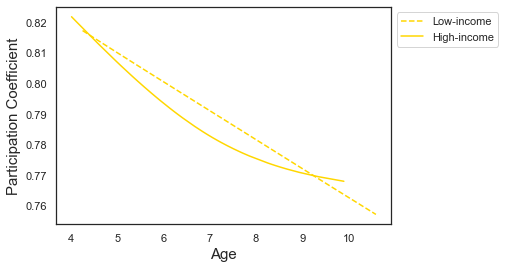

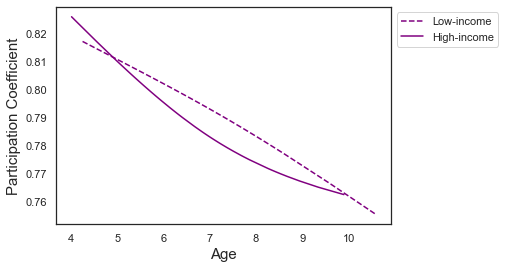

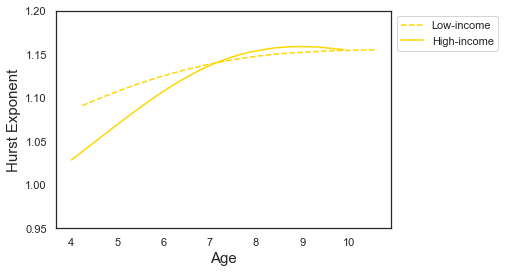

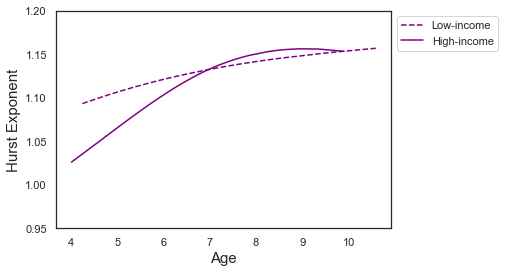

In [11]:
sns.set(style="white")
colors = ['gold', 'purple']
style = ['--', '-']
for modality, a in zip(['Participation Coefficient','Hurst Exponent'], [part_income,H_income]):
    for ses,x in enumerate([0, int(a.shape[0]/2)]):
        figure = plt.figure()
        df = a.sort_values('income_median').iloc[x:x+int(a.shape[0]/2), :]
        for t,i in enumerate(np.arange(0,400,200)):
            df['mean'] = df.iloc[:, sa[i:i+200]].mean(axis=1).values
            gam = LinearGAM(s(0, n_splines=5)).fit(df['age_scan'],df['mean'])#stats.zscore( #, n_splines=20
            plt.plot(df['age_scan'].sort_values().values, gam.predict(df['age_scan'].sort_values().values), style[ses],color=colors[t])
            plt.xlabel('Age', size=15)
            plt.ylabel(modality, size=15)
            alls = [list(df[df.age_bin==i]['mean'].values) for i in np.unique(df.age_bin)]
        plt.legend(['Sensory',  'Association'], loc='upper left', bbox_to_anchor=(1, 1))
        if modality == 'Hurst Exponent':
            plt.ylim([0.95, 1.2])
for modality, a in zip(['Participation Coefficient','Hurst Exponent'], [part_income,H_income]):
    for t,i in enumerate(np.arange(0,400,200)):
        figure = plt.figure()
        for ses,x in enumerate([0, int(a.shape[0]/2)]):
            df = a.sort_values('income_median').iloc[x:x+int(a.shape[0]/2), :]
            df['mean'] = df.iloc[:, sa[i:i+200]].mean(axis=1).values
            gam = LinearGAM(s(0, n_splines=5)).fit(df['age_scan'],df['mean'])#stats.zscore( #, n_splines=20
            plt.plot(df['age_scan'].sort_values().values, gam.predict(df['age_scan'].sort_values().values), style[ses],color=colors[t])
            plt.xlabel('Age', size=15)
            plt.ylabel(modality, size=15)
            alls = [list(df[df.age_bin==i]['mean'].values) for i in np.unique(df.age_bin)]
        plt.legend(['Low-income',  'High-income'], loc='upper left', bbox_to_anchor=(1, 1))
        if modality == 'Hurst Exponent':
            plt.ylim([0.95, 1.2])

In [12]:
partlh = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/derivative/imageData_t1/test/n125_long_inc_part_coef_avg_nodewise_avgrunsschaefer400lh_parent_edu.csv')
partrh = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/derivative/imageData_t1/test/n125_long_inc_part_coef_avg_nodewise_avgrunsschaefer400rh_parent_edu.csv')
part_income = pd.concat([partlh.iloc[:, :200], partrh], axis=1)
H_income = pd.read_csv('/Users/monaminishio/Desktop/HOME1/Functional/derivative/hurst_exponent/hurst_parent.csv')
H_income = H_income.loc[:, ['fsid', 'parent_edu']]
part_income = part_income.loc[:, ['fsid', 'parent_edu']]
H_income = pd.merge(H, H_income, how='right')
part_income = pd.merge(part, part_income, how='right')

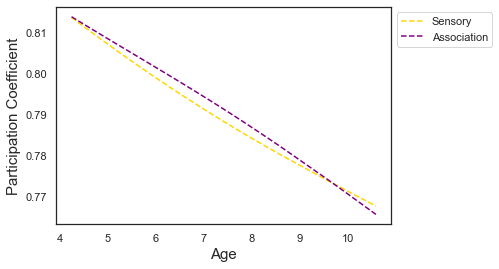

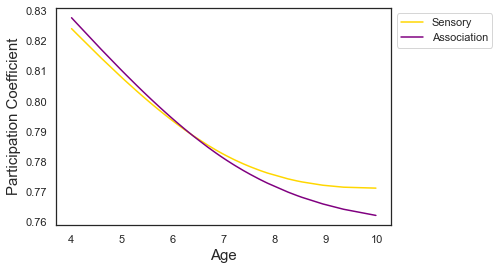

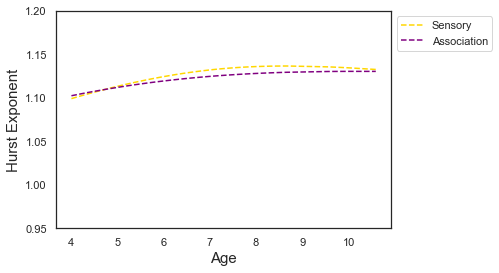

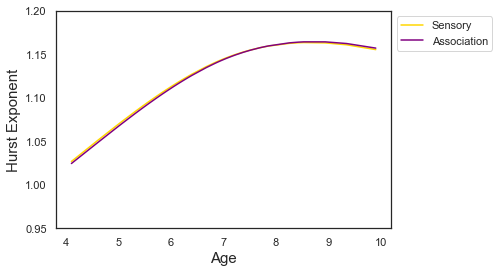

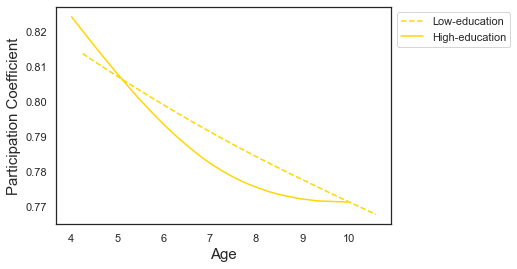

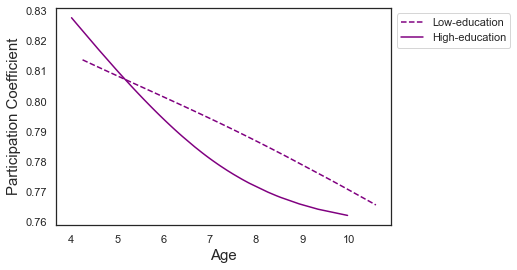

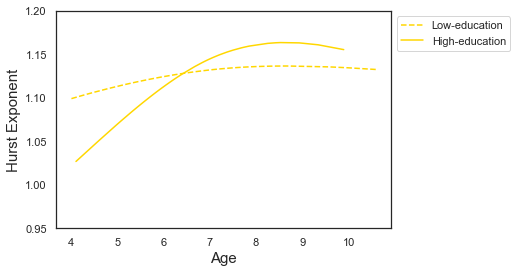

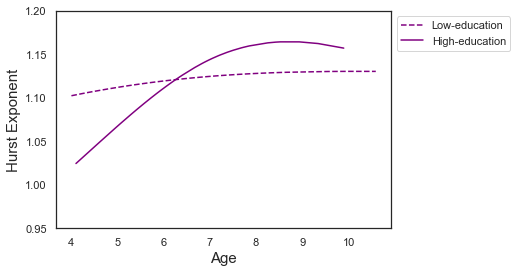

In [13]:
sns.set(style="white")
colors = ['gold', 'purple']
style = ['--', '-']
for modality, a in zip(['Participation Coefficient','Hurst Exponent'], [part_income,H_income]):
    for ses,x in enumerate([0, int(a.shape[0]/2)]):
        figure = plt.figure()
        df = a.sort_values('parent_edu').iloc[x:x+int(a.shape[0]/2), :]
        for t,i in enumerate(np.arange(0,400,200)):
            df['mean'] = df.iloc[:, sa[i:i+200]].mean(axis=1).values
            gam = LinearGAM(s(0, n_splines=5)).fit(df['age_scan'],df['mean'])#stats.zscore( #, n_splines=20
            plt.plot(df['age_scan'].sort_values().values, gam.predict(df['age_scan'].sort_values().values), style[ses],color=colors[t])
            plt.xlabel('Age', size=15)
            plt.ylabel(modality, size=15)
            alls = [list(df[df.age_bin==i]['mean'].values) for i in np.unique(df.age_bin)]
        plt.legend(['Sensory',  'Association'], loc='upper left', bbox_to_anchor=(1, 1))
        if modality == 'Hurst Exponent':
            plt.ylim([0.95, 1.2])
for modality, a in zip(['Participation Coefficient','Hurst Exponent'], [part_income,H_income]):
    for t,i in enumerate(np.arange(0,400,200)):
        figure = plt.figure()
        for ses,x in enumerate([0, int(a.shape[0]/2)]):
            df = a.sort_values('parent_edu').iloc[x:x+int(a.shape[0]/2), :]
            df['mean'] = df.iloc[:, sa[i:i+200]].mean(axis=1).values
            gam = LinearGAM(s(0, n_splines=5)).fit(df['age_scan'],df['mean'])#stats.zscore( #, n_splines=20
            plt.plot(df['age_scan'].sort_values().values, gam.predict(df['age_scan'].sort_values().values), style[ses],color=colors[t])
            plt.xlabel('Age', size=15)
            plt.ylabel(modality, size=15)
            alls = [list(df[df.age_bin==i]['mean'].values) for i in np.unique(df.age_bin)]
        plt.legend(['Low-education',  'High-education'], loc='upper left', bbox_to_anchor=(1, 1))
        if modality == 'Hurst Exponent':
            plt.ylim([0.95, 1.2])